<a href="https://colab.research.google.com/github/Ninga001/text-analysis/blob/main/reagan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import **dependancies**

In [17]:
import requests
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


*Function* to download a webpage


In [6]:
def download_webpage(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        raise Exception("Failed to download the webpage")

Sample webpage **URL**

In [7]:
webpage_url = "https://www.digitalocean.com/community/tutorials/how-to-work-with-web-data-using-requests-and-beautiful-soup-with-python-3"


Download the webpage

In [8]:
webpage_text = download_webpage(webpage_url)


Step 1: Split the text into sentences


In [9]:
sentences = sent_tokenize(webpage_text)
print(sentences)


['<!DOCTYPE html><html lang="en" dir="ltr"><head><meta charSet="utf-8"/><link rel="apple-touch-icon" sizes="180x180" href="/_next/static/media/apple-touch-icon.d7edaa01.png"/><link rel="icon" sizes="192x192" href="/_next/static/media/android-chrome-192x192.f09059d8.png"/><link rel="icon" sizes="512x512" href="/_next/static/media/android-chrome-512x512.5f2e6221.png"/><link rel="icon" type="image/png" sizes="32x32" href="/_next/static/media/favicon-32x32.b7ef9ede.png"/><link rel="icon" type="image/png" sizes="16x16" href="/_next/static/media/favicon-16x16.71c34517.png"/><link rel="icon" type="image/x-icon" href="/_next/static/media/favicon.594d6067.ico"/><meta name="viewport" content="minimum-scale=1, initial-scale=1, width=device-width, shrink-to-fit=no"/><meta name="twitter:card" content="summary"/><meta property="og:type" content="website"/><title>How To Work with Web Data Using Requests and Beautiful Soup with Python 3  | DigitalOcean</title><meta name="description" content="This tut

# **Step 2: Tokenize**

In [13]:
tokens = [word_tokenize(sentence) for sentence in sentences]
print(tokens)

[['<', '!', 'DOCTYPE', 'html', '>', '<', 'html', 'lang=', "''", 'en', "''", 'dir=', "''", 'ltr', "''", '>', '<', 'head', '>', '<', 'meta', 'charSet=', "''", 'utf-8', "''", '/', '>', '<', 'link', 'rel=', "''", 'apple-touch-icon', "''", 'sizes=', "''", '180x180', "''", 'href=', "''", '/_next/static/media/apple-touch-icon.d7edaa01.png', "''", '/', '>', '<', 'link', 'rel=', "''", 'icon', "''", 'sizes=', "''", '192x192', "''", 'href=', "''", '/_next/static/media/android-chrome-192x192.f09059d8.png', "''", '/', '>', '<', 'link', 'rel=', "''", 'icon', "''", 'sizes=', "''", '512x512', "''", 'href=', "''", '/_next/static/media/android-chrome-512x512.5f2e6221.png', "''", '/', '>', '<', 'link', 'rel=', "''", 'icon', "''", 'type=', "''", 'image/png', "''", 'sizes=', "''", '32x32', "''", 'href=', "''", '/_next/static/media/favicon-32x32.b7ef9ede.png', "''", '/', '>', '<', 'link', 'rel=', "''", 'icon', "''", 'type=', "''", 'image/png', "''", 'sizes=', "''", '16x16', "''", 'href=', "''", '/_next/stat

Step 3: POS tagging


In [20]:
import nltk

tagged_tokens = [nltk.pos_tag(token) for token in tokens]

# Step 4: Remove stop words


In [23]:
stop_words = set(stopwords.words('english'))
filtered_tokens = [
    [word for word, tag in tagged_token if word.lower() not in stop_words]
    for tagged_token in tagged_tokens
]
print(filtered_tokens)

[['<', '!', 'DOCTYPE', 'html', '>', '<', 'html', 'lang=', "''", 'en', "''", 'dir=', "''", 'ltr', "''", '>', '<', 'head', '>', '<', 'meta', 'charSet=', "''", 'utf-8', "''", '/', '>', '<', 'link', 'rel=', "''", 'apple-touch-icon', "''", 'sizes=', "''", '180x180', "''", 'href=', "''", '/_next/static/media/apple-touch-icon.d7edaa01.png', "''", '/', '>', '<', 'link', 'rel=', "''", 'icon', "''", 'sizes=', "''", '192x192', "''", 'href=', "''", '/_next/static/media/android-chrome-192x192.f09059d8.png', "''", '/', '>', '<', 'link', 'rel=', "''", 'icon', "''", 'sizes=', "''", '512x512', "''", 'href=', "''", '/_next/static/media/android-chrome-512x512.5f2e6221.png', "''", '/', '>', '<', 'link', 'rel=', "''", 'icon', "''", 'type=', "''", 'image/png', "''", 'sizes=', "''", '32x32', "''", 'href=', "''", '/_next/static/media/favicon-32x32.b7ef9ede.png', "''", '/', '>', '<', 'link', 'rel=', "''", 'icon', "''", 'type=', "''", 'image/png', "''", 'sizes=', "''", '16x16', "''", 'href=', "''", '/_next/stat

# Step 5: Lemmatization

In [24]:
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [
    [lemmatizer.lemmatize(word, pos=pos[0].lower()) if pos[0].lower() in ['a', 'n', 'v'] else lemmatizer.lemmatize(word)
     for word, pos in tagged_token]
    for tagged_token in tagged_tokens
]


# *Flatten the list of lemmatized tokens*



In [25]:
flat_lemmatized_tokens = [word for sentence in lemmatized_tokens for word in sentence]

# Step 6: Plot frequency distribution before and after lemmatization

In [28]:
freq_dist_before = FreqDist(flat_lemmatized_tokens)
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

# Plot before lemmatization


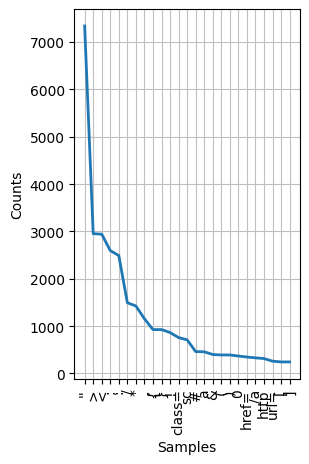

Text(0.5, 1.0, 'Frequency Distribution Before Lemmatization')

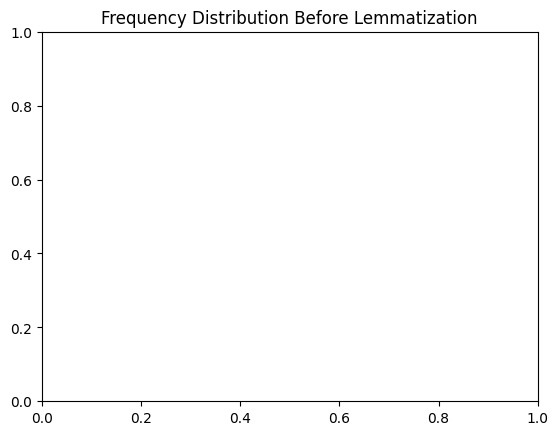

In [29]:
plt.subplot(1, 2, 1)
freq_dist_before.plot(25, cumulative=False)
plt.title('Frequency Distribution Before Lemmatization')

# Top 5 and Bottom 5 words before lemmatization


In [31]:
top_5_before = freq_dist_before.most_common(5)
bottom_5_before = freq_dist_before.most_common()[-5:]

print("Top 5 words before lemmatization:", top_5_before)
print("Bottom 5 words before lemmatization:", bottom_5_before)

Top 5 words before lemmatization: [("''", 7342), ('>', 2953), ('<', 2943), (';', 2596), (':', 2490)]
Bottom 5 words before lemmatization: [('isFallback', 1), ('dynamicIds', 1), ('17915,32795,93844,84873,69396', 1), ('gsp', 1), ('scriptLoader', 1)]


#  Plot after lemmatization


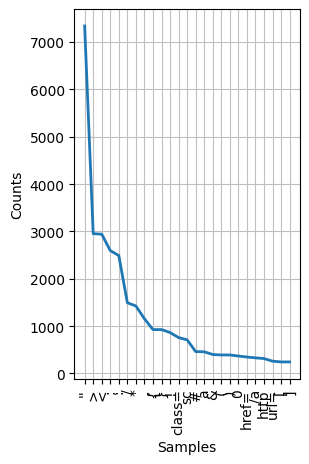

Text(0.5, 1.0, 'Frequency Distribution After Lemmatization')

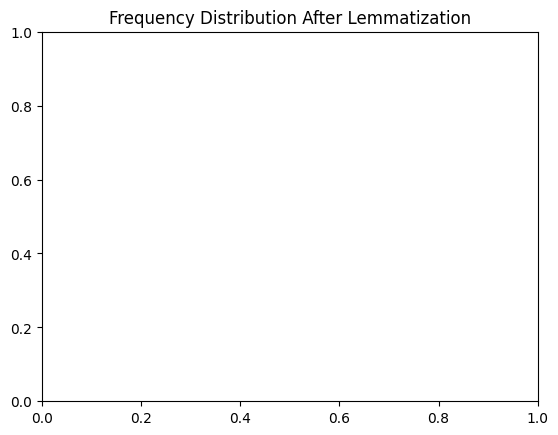

In [32]:
plt.subplot(1, 2, 2)
freq_dist_after = FreqDist(flat_lemmatized_tokens)
freq_dist_after.plot(25, cumulative=False)
plt.title('Frequency Distribution After Lemmatization')

# Top 5 and Bottom 5 words after lemmatization


In [ ]:
top_5_after = freq_dist_after.most_common(5)
bottom_5_after = freq_dist_after.most_common()[-5:]

# Print results

In [36]:
print("\nTop 5 words after lemmatization:", top_5_after)
print("Bottom 5 words after lemmatization:", bottom_5_after)
plt.show()


Top 5 words after lemmatization: ['the', 'of', 'and', 'to', 'a']
Bottom 5 words after lemmatization: ['be', 'in', 'have', 'that', 'it']
